# USArray Seismometer Network Data Discovery #
This notebook will demonstrate accessing and visualing data about the USArray project.

The original data file was downloaded [here](http://ds.iris.edu/files/earthscope/usarray/_US-REF-StationList.txt) on November 17, 2019.  The data are the Reference Network.

If you want to learn more about USArray and the EarthScope project, visit the [USArray](http://www.usarray.org/) webpage.

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
in_file = "../data/2019Nov17_US-REF-StationList.txt"

In [3]:
with open(in_file) as file:
    try:
        df = pd.read_csv(file, sep='\t')
    except:
        print('Error reading file')

In [4]:
df.head()

,VNET,NET,STA,SITE DESCRIPTION,LAT,LON,ELEV,START,END,STATUS,INSTALL,CERT
0,_US-REF,AK,BMR,"Bremner River, AK, USA",60.97,-144.61,842.0,2004/01/01,2599/12/31,Operating,NaN,NaN
1,_US-REF,AK,TNA,"Tin City, AK, USA",65.56,-167.93,74.0,2004/01/01,2599/12/31,Operating,NaN,NaN
2,_US-REF,AT,PMR,"Palmer, Alaska",61.59,-149.13,100.0,2004/01/01,2599/12/31,Operating,NaN,NaN
3,_US-REF,AT,SDPT,"Sand Point, Alaska",55.35,-160.48,74.0,2004/01/01,2599/12/31,Operating,NaN,NaN
4,_US-REF,AT,SMY,"Shemya, Alaska",52.73,174.10,58.0,2004/01/01,2599/12/31,Operating,NaN,NaN


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LAT,121.0,40.931983,7.772801,27.55,35.14,40.20,44.59,65.56
LON,121.0,-97.300826,47.724259,-176.68,-115.66,-102.63,-87.83,174.10
ELEV,121.0,741.052893,713.100046,-413.00,200.00,478.00,1280.00,2743.00
INSTALL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CERT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 12 columns):
VNET                121 non-null object
NET                 121 non-null object
STA                 121 non-null object
SITE DESCRIPTION    121 non-null object
LAT                 121 non-null float64
LON                 121 non-null float64
ELEV                121 non-null float64
START               121 non-null object
END                 121 non-null object
STATUS              121 non-null object
INSTALL             0 non-null float64
CERT                0 non-null float64
dtypes: float64(5), object(7)
memory usage: 11.5+ KB


In [7]:
df['STATUS'].unique()

array(['Operating', 'Ended'], dtype=object)

In [8]:
df['STATUS'].value_counts()

Operating    92
Ended        29
Name: STATUS, dtype: int64

**It appears that both INSTALL and CERT are empty and so they can be dropped**

In [9]:
df.drop(labels=['INSTALL','CERT'], axis=1, inplace=True)

In [10]:
df.head()

,VNET,NET,STA,SITE DESCRIPTION,LAT,LON,ELEV,START,END,STATUS
0,_US-REF,AK,BMR,"Bremner River, AK, USA",60.97,-144.61,842.0,2004/01/01,2599/12/31,Operating
1,_US-REF,AK,TNA,"Tin City, AK, USA",65.56,-167.93,74.0,2004/01/01,2599/12/31,Operating
2,_US-REF,AT,PMR,"Palmer, Alaska",61.59,-149.13,100.0,2004/01/01,2599/12/31,Operating
3,_US-REF,AT,SDPT,"Sand Point, Alaska",55.35,-160.48,74.0,2004/01/01,2599/12/31,Operating
4,_US-REF,AT,SMY,"Shemya, Alaska",52.73,174.10,58.0,2004/01/01,2599/12/31,Operating


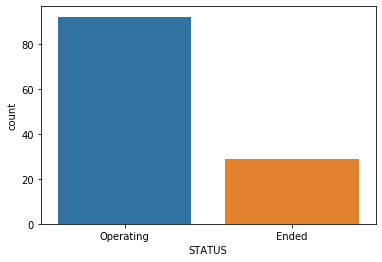

In [11]:
sns.countplot(x='STATUS', data=df)

In [12]:
df['START'].unique()

array(['2004/01/01', '2006/02/03', '2006/04/04', '2006/10/05',
       '2006/07/13', '2006/06/20', '2018/01/26', '2008/02/12',
       '2007/05/07', '2009/02/12', '2008/10/18', '2008/10/05',
       '2007/10/03', '2008/07/15', '2008/10/13', '2008/12/03',
       '2008/10/04', '2008/04/23', '2007/11/12', '2007/02/09',
       '2012/08/02', '2008/10/09', '2008/10/07', '2010/08/24',
       '2009/03/16', '2008/10/16', '2007/05/01', '2009/02/11',
       '2010/09/27', '2006/08/12', '2004/11/23', '2006/06/15',
       '2007/01/01', '2006/06/25', '2006/09/25', '2006/05/17',
       '2006/08/18', '2005/10/01', '2004/03/19', '2006/08/10',
       '2006/08/24', '2006/06/16', '2004/07/13', '2005/10/06',
       '2006/04/18', '2004/05/12', '2006/07/05', '2007/06/28',
       '2006/07/02', '2006/06/01', '2005/02/23', '2007/04/13',
       '2006/08/27', '2006/01/09'], dtype=object)

In [13]:
df['END'].unique()

array(['2599/12/31', '2006/07/12', '2006/06/20', '2010/04/01',
       '2018/01/26', '2010/05/02', '2019/03/08', '2018/09/07',
       '2018/08/15', '2010/06/13', '2018/09/04', '2017/03/16',
       '2015/04/28', '2017/04/25', '2010/09/26', '2018/09/25',
       '2019/09/14'], dtype=object)

In [14]:
df['NET'].unique()

array(['AK', 'AT', 'BK', 'CI', 'ET', 'II', 'IM', 'IU', 'LB', 'LD', 'NN',
       'TA', 'UO', 'US', 'UU'], dtype=object)

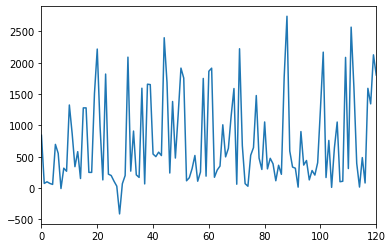

In [17]:
df['ELEV'].plot()

In [18]:
df.groupby('NET').mean()

,LAT,LON,ELEV
NET,,,
AK,63.265000,-156.270000,458.000000
AT,56.556667,-45.170000,77.333333
BK,39.224000,-122.044000,365.940000
CI,34.870000,-117.440000,846.666667
ET,35.220000,-85.930000,581.000000
II,41.666667,-128.500000,904.000000
IM,43.258000,2.986000,1043.880000
IU,39.737143,-104.074286,429.857143
LB,40.430000,-117.220000,1594.000000


**There is a station very nearby to me in Hockley, TX**

The station is 'HKT'.  Let's grab it and take a look

In [19]:
df[df['STA'] == 'HKT']

,VNET,NET,STA,SITE DESCRIPTION,LAT,LON,ELEV,START,END,STATUS
28,_US-REF,IU,HKT,"Hockley, Texas",29.96,-95.84,-413.0,2004/01/01,2018/01/26,Ended
29,_US-REF,IU,HKT,"Hockley, Texas",29.96,-95.84,69.0,2018/01/26,2599/12/31,Operating


Very interesting.  The elevations are in meters.  I think that the negative elevation station must have been deployed underground in the Hockley Salt Dome.

**Adding columns for State name**

I came across a useful package called [us](https://pypi.org/project/us/)

One of the nice features of this library is that it makes it very quick to create look-up dictionaries in the form of:

* 'AK':'Alaska'
* 'Alaska':'AK'

In [20]:
import us

In [21]:
state_abbrev_dict = us.states.mapping('abbr', 'name')
state_name_dict = us.states.mapping('name', 'abbr')

In [22]:
state_abbrev_dict.keys()

dict_keys(['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DK', 'DE', 'DC', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'OL', 'PA', 'PI', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV', 'WI', 'WY'])

In [23]:
state_abbrev_dict.values()

dict_values(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Dakota', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Orleans', 'Pennsylvania', 'Philippine Islands', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'])

In [24]:
state_name_dict.keys()

dict_keys(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Dakota', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Orleans', 'Pennsylvania', 'Philippine Islands', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'])

In [25]:
state_name_dict.values()

dict_values(['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DK', 'DE', 'DC', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'OL', 'PA', 'PI', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV', 'WI', 'WY'])

In the dataframe, this information is embedded in the 'SITE DESCRIPTION' column

In [27]:
df['SITE DESCRIPTION'].unique()

array(['Bremner River, AK, USA', 'Tin City, AK, USA', 'Palmer, Alaska',
       'Sand Point, Alaska', 'Shemya, Alaska',
       'Columbia College, Columbia, CA, USA', 'Hull Mountain, OR, USA',
       'Marconi Conference Center, Marshall, CA, USA',
       'San Andreas Geophysical Obs., Hollister, CA, USA',
       'Whiskeytown Dam, Whiskeytown, CA, USA',
       'Granite Mountains Research Center', 'Isabella',
       'Art Center College of Design (GSN-affiliate)', 'Sewanee,TN',
       'Kodiak Island, Alaska, USA', 'Pinon Flat, California, USA',
       'Attu Island, AK, USA', 'NVAR Array Site 31, Mina, NV, USA',
       'PDAR Array, Pinedale, WY, USA', 'TXAR Array, Lajitas, TX, USA',
       'Adak, Aleutian Islands, Alaska', 'Albuquerque, New Mexico, USA',
       'Cathedral Cave, Missouri, USA', 'College Outpost, Alaska, USA',
       'Corvallis, Oregon, USA',
       'Disney Wilderness Preserve, Florida, USA', 'Hockley, Texas',
       'Adam Dziewonski Observatory (Oak Ridge), Massachusetts, USA

Grab the first five 'SITE DESCRIPTION' entries

In [29]:
df['SITE DESCRIPTION'][0:6]

0                 Bremner River, AK, USA
1                      Tin City, AK, USA
2                         Palmer, Alaska
3                     Sand Point, Alaska
4                         Shemya, Alaska
5    Columbia College, Columbia, CA, USA
Name: SITE DESCRIPTION, dtype: object

So we see there is a mixture of both abbreviated and full names.  That is why two dictionaries are needed

In [42]:
list(df['SITE DESCRIPTION'][0].split())

['Bremner', 'River,', 'AK,', 'USA']

In [49]:
for site in df['SITE DESCRIPTION'][0:6]:
    site_list = list(site.split())
    for item in site_list:
        if item in state_abbrev_dict.keys() or item in state_name_dict.keys():
            print(item)

Alaska
Alaska
Alaska


Ok, it works, sort of.  Notice that there are trailing commas which need to be dealt with.

Time for re

In [50]:
import re

In [57]:
re.split('[, ]', df['SITE DESCRIPTION'][0])

['Bremner', 'River', '', 'AK', '', 'USA']

In [62]:
for site in df['SITE DESCRIPTION'][0:6]:
    print(site)
    print(re.split('[, ]', site))

Bremner River, AK, USA
['Bremner', 'River', '', 'AK', '', 'USA']
Tin City, AK, USA
['Tin', 'City', '', 'AK', '', 'USA']
Palmer, Alaska
['Palmer', '', 'Alaska']
Sand Point, Alaska
['Sand', 'Point', '', 'Alaska']
Shemya, Alaska
['Shemya', '', 'Alaska']
Columbia College, Columbia, CA, USA
['Columbia', 'College', '', 'Columbia', '', 'CA', '', 'USA']


In [74]:
for site in df['SITE DESCRIPTION'][0:6]:
    #print('site: {}'.format(site))
    site_list = re.split('[, ]', site)
    for item in site_list:
        #print(item)
        if item in state_abbrev_dict.keys():
            print(item)
        elif item in state_name_dict.keys():
            print(state_name_dict[item])

AK
AK
AK
AK
AK
CA


In [72]:
state_abbrev_dict.get('AK')

'Alaska'

There should be a quicker way to do this.  Let's write a function that does this same operation and then use .apply

In [77]:
def get_State(site):
    """Assumes site a string from a single row of pandas series
    uses us library to create lookup tables of US State Name/Abbreviation
    and then parses the string into a searchable list using re
    Returns the State Abbreviation as a string
    """
    import us
    import re
    state_abbrev_dict = us.states.mapping('abbr', 'name')
    state_name_dict = us.states.mapping('name', 'abbr')
    
    site_list = re.split('[, ]', site)
    for item in site_list:
        if item in state_abbrev_dict.keys():
            return item
        elif item in state_name_dict.keys():
            return state_name_dict[item]
    
    

In [81]:
df['STATE'] = df['SITE DESCRIPTION'].apply(get_State)

In [83]:
df.head(20)

,VNET,NET,STA,SITE DESCRIPTION,LAT,LON,ELEV,START,END,STATUS,STATE
0,_US-REF,AK,BMR,"Bremner River, AK, USA",60.97,-144.61,842.0,2004/01/01,2599/12/31,Operating,AK
1,_US-REF,AK,TNA,"Tin City, AK, USA",65.56,-167.93,74.0,2004/01/01,2599/12/31,Operating,AK
2,_US-REF,AT,PMR,"Palmer, Alaska",61.59,-149.13,100.0,2004/01/01,2599/12/31,Operating,AK
3,_US-REF,AT,SDPT,"Sand Point, Alaska",55.35,-160.48,74.0,2004/01/01,2599/12/31,Operating,AK
4,_US-REF,AT,SMY,"Shemya, Alaska",52.73,174.10,58.0,2004/01/01,2599/12/31,Operating,AK
5,_US-REF,BK,CMB,"Columbia College, Columbia, CA, USA",38.03,-120.39,697.0,2004/01/01,2599/12/31,Operating,CA
6,_US-REF,BK,HUMO,"Hull Mountain, OR, USA",42.61,-122.96,554.9,2004/01/01,2599/12/31,Operating,OR
7,_US-REF,BK,MCCM,"Marconi Conference Center, Marshall, CA, USA",38.14,-122.88,-7.7,2006/02/03,2599/12/31,Operating,CA
8,_US-REF,BK,SAO,"San Andreas Geophysical Obs., Hollister, CA, USA",36.76,-121.45,317.2,2004/01/01,2599/12/31,Operating,CA
9,_US-REF,BK,WDC,"Whiskeytown Dam, Whiskeytown, CA, USA",40.58,-122.54,268.3,2004/01/01,2599/12/31,Operating,CA


In [84]:
df['STATE'].unique()

array(['AK', 'CA', 'OR', None, 'TN', 'NV', 'WY', 'TX', 'MO', 'FL', 'MA',
       'DK', 'PA', 'AZ', 'IN', 'NM', 'NE', 'SD', 'SC', 'CO', 'ND', 'VA',
       'MN', 'GA', 'OK', 'MI', 'OH', 'MT', 'AL', 'KS', 'WI', 'UT', 'WA',
       'IL', 'ID', 'AR', 'MS', 'ME', 'IA'], dtype=object)

In [86]:
df[df['STATE'].isnull()]

,VNET,NET,STA,SITE DESCRIPTION,LAT,LON,ELEV,START,END,STATUS,STATE
10,_US-REF,CI,GMR,Granite Mountains Research Center,34.78,-115.66,1326.0,2006/04/04,2599/12/31,Operating,None
11,_US-REF,CI,ISA,Isabella,35.66,-118.47,873.0,2004/01/01,2599/12/31,Operating,None
12,_US-REF,CI,PASC,Art Center College of Design (GSN-affiliate),34.17,-118.19,341.0,2006/10/05,2599/12/31,Operating,None
23,_US-REF,IU,ANMO,"Albuquerque, New Mexico, USA",34.95,-106.46,1820.0,2004/01/01,2599/12/31,Operating,None
37,_US-REF,LD,PAL,"Palisades, New York",41.01,-73.91,66.0,2004/01/01,2599/12/31,Operating,None
66,_US-REF,US,BINY,"Binghamton, New York, USA",42.20,-75.99,498.0,2004/01/01,2599/12/31,Operating,None
74,_US-REF,US,CNNC,"Cliffs of the Neuse, North Carolina, USA",35.24,-77.89,29.0,2006/06/25,2018/09/25,Ended,None
94,_US-REF,US,LBNH,"Lisbon, New Hampshire, USA",44.24,-71.93,367.0,2004/01/01,2599/12/31,Operating,None
95,_US-REF,US,LONY,"Lake Ozonia, New York, USA",44.62,-74.58,440.0,2005/10/06,2599/12/31,Operating,None
104,_US-REF,US,NHSC,"New Hope, South Carolina, USA",33.11,-80.18,11.0,2004/01/01,2599/12/31,Operating,None


Oh Calamity!

While this works perfectly for most of the entries, there are some states that are two words separated by a space that get broken up by re...

We can modify the function for these certain exceptions

In [101]:
multi_word_states = [x for x in state_name_dict.keys() if len(x.split()) > 1]

In [102]:
multi_word_states

['American Samoa',
 'District of Columbia',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Northern Mariana Islands',
 'Philippine Islands',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Virgin Islands',
 'West Virginia']

In [106]:
df_multi_word_states = df[df['STATE'].isnull()]

In [108]:
df_multi_word_states

,VNET,NET,STA,SITE DESCRIPTION,LAT,LON,ELEV,START,END,STATUS,STATE
10,_US-REF,CI,GMR,Granite Mountains Research Center,34.78,-115.66,1326.0,2006/04/04,2599/12/31,Operating,None
11,_US-REF,CI,ISA,Isabella,35.66,-118.47,873.0,2004/01/01,2599/12/31,Operating,None
12,_US-REF,CI,PASC,Art Center College of Design (GSN-affiliate),34.17,-118.19,341.0,2006/10/05,2599/12/31,Operating,None
23,_US-REF,IU,ANMO,"Albuquerque, New Mexico, USA",34.95,-106.46,1820.0,2004/01/01,2599/12/31,Operating,None
37,_US-REF,LD,PAL,"Palisades, New York",41.01,-73.91,66.0,2004/01/01,2599/12/31,Operating,None
66,_US-REF,US,BINY,"Binghamton, New York, USA",42.20,-75.99,498.0,2004/01/01,2599/12/31,Operating,None
74,_US-REF,US,CNNC,"Cliffs of the Neuse, North Carolina, USA",35.24,-77.89,29.0,2006/06/25,2018/09/25,Ended,None
94,_US-REF,US,LBNH,"Lisbon, New Hampshire, USA",44.24,-71.93,367.0,2004/01/01,2599/12/31,Operating,None
95,_US-REF,US,LONY,"Lake Ozonia, New York, USA",44.62,-74.58,440.0,2005/10/06,2599/12/31,Operating,None
104,_US-REF,US,NHSC,"New Hope, South Carolina, USA",33.11,-80.18,11.0,2004/01/01,2599/12/31,Operating,None


In [111]:
for state in multi_word_states:
    if state in df_multi_word_states['SITE DESCRIPTION'][23]:
        print(re.split('[,]', df_multi_word_states['SITE DESCRIPTION'][23]))

['Albuquerque', ' New Mexico', ' USA']


In [123]:
if 'New Mexico' in df_multi_word_states['SITE DESCRIPTION'][23]: print(True)

True


This will work, I think!  Lets add this to the function and see if we can capture the States that have more than one word in the name

In [165]:
# Modified the function by pulling the imports, dictionary creations, and multi_word_state list out

import us
import re
state_abbrev_dict = us.states.mapping('abbr', 'name')
state_name_dict = us.states.mapping('name', 'abbr')

multi_word_states = [x for x in state_name_dict.keys() if len(x.split()) > 1]

def get_State(site, state_abbrev_dict, state_name_dict, multi_word_states):
    """Function to parse 'SITE_DESCRIPTION' for US STATE abbreviation
    
    Assumes
    :site a string
    :state_abbrev_dict a dictionary
    :state_name_dict a dictionary
    :multi_word_states a list
    
    Checks first whether the site contains a multi_word_state
    Uses the look-up dictionaries to get the proper STATE abbreviation
    
    Returns a string
    """
    
    multi_word_state_found = 0
    
    for state in multi_word_states:
        if state in site:
            site_list = site.split(sep=',')
            multi_word_state_found = 1
            
    if multi_word_state_found == 0:
        site_list = re.split('[, ]', site)
    
    # If the state name is multi word, there is a leading white space that needs
    # to be stripped in order for the look-up to work
    for item in site_list:
        if item.strip() in state_abbrev_dict.keys():
            return item.strip()
        elif item.strip() in state_name_dict.keys():
            return state_name_dict[item.strip()]


In [166]:
df.drop('STATE', axis=1, inplace=True)

In [168]:
df['STATE'] = df['SITE DESCRIPTION'].apply(get_State, args=(state_abbrev_dict, state_name_dict, multi_word_states))

In [169]:
df.head(20)

,VNET,NET,STA,SITE DESCRIPTION,LAT,LON,ELEV,START,END,STATUS,STATE
0,_US-REF,AK,BMR,"Bremner River, AK, USA",60.97,-144.61,842.0,2004/01/01,2599/12/31,Operating,AK
1,_US-REF,AK,TNA,"Tin City, AK, USA",65.56,-167.93,74.0,2004/01/01,2599/12/31,Operating,AK
2,_US-REF,AT,PMR,"Palmer, Alaska",61.59,-149.13,100.0,2004/01/01,2599/12/31,Operating,AK
3,_US-REF,AT,SDPT,"Sand Point, Alaska",55.35,-160.48,74.0,2004/01/01,2599/12/31,Operating,AK
4,_US-REF,AT,SMY,"Shemya, Alaska",52.73,174.10,58.0,2004/01/01,2599/12/31,Operating,AK
5,_US-REF,BK,CMB,"Columbia College, Columbia, CA, USA",38.03,-120.39,697.0,2004/01/01,2599/12/31,Operating,CA
6,_US-REF,BK,HUMO,"Hull Mountain, OR, USA",42.61,-122.96,554.9,2004/01/01,2599/12/31,Operating,OR
7,_US-REF,BK,MCCM,"Marconi Conference Center, Marshall, CA, USA",38.14,-122.88,-7.7,2006/02/03,2599/12/31,Operating,CA
8,_US-REF,BK,SAO,"San Andreas Geophysical Obs., Hollister, CA, USA",36.76,-121.45,317.2,2004/01/01,2599/12/31,Operating,CA
9,_US-REF,BK,WDC,"Whiskeytown Dam, Whiskeytown, CA, USA",40.58,-122.54,268.3,2004/01/01,2599/12/31,Operating,CA


In [170]:
df[df['STATE'].isnull()]

,VNET,NET,STA,SITE DESCRIPTION,LAT,LON,ELEV,START,END,STATUS,STATE
10,_US-REF,CI,GMR,Granite Mountains Research Center,34.78,-115.66,1326.0,2006/04/04,2599/12/31,Operating,None
11,_US-REF,CI,ISA,Isabella,35.66,-118.47,873.0,2004/01/01,2599/12/31,Operating,None
12,_US-REF,CI,PASC,Art Center College of Design (GSN-affiliate),34.17,-118.19,341.0,2006/10/05,2599/12/31,Operating,None


Success!  There are only three stations without State names.  These can either be ignored or fixed manually

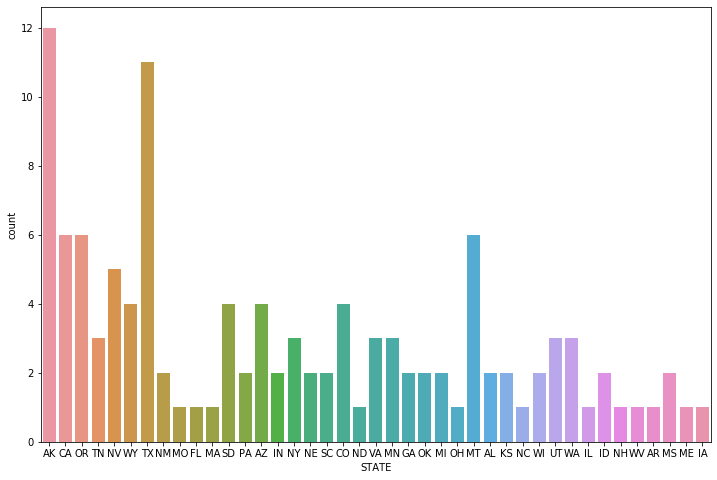

In [171]:
fig = plt.figure(figsize=(12,8))
sns.countplot(x='STATE', data=df)

Let's order this by counts

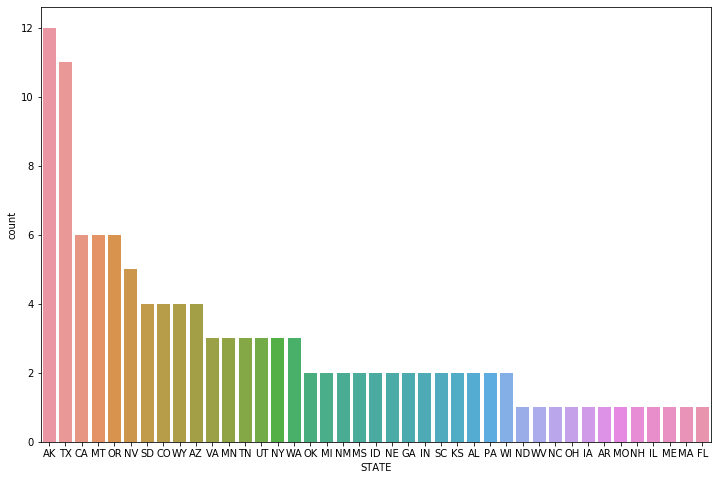

In [172]:
fig = plt.figure(figsize=(12,8))
sns.countplot(x='STATE', data=df, order=df['STATE'].value_counts().index)
plt.show()

Lets use a nicer colormap

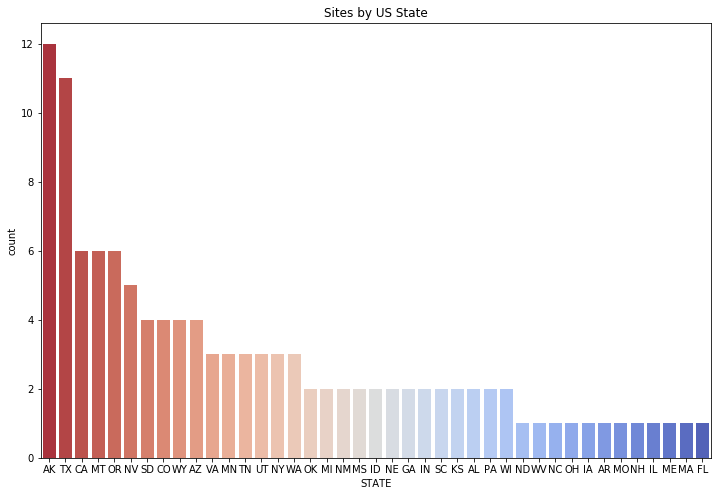

In [181]:
fig = plt.figure(figsize=(12,8))
sns.countplot(x='STATE', data=df, order=df['STATE'].value_counts().index, palette='coolwarm_r')
plt.title('Sites by US State')
plt.show()

Woo!  TX has the second most number of USArray reference (non-travelling) sites

In [182]:
get_State?

Signature: get_State(site, state_abbrev_dict, state_name_dict, multi_word_states)
Docstring:
Function to parse 'SITE_DESCRIPTION' for US STATE abbreviation

Assumes
:site a string
:state_abbrev_dict a dictionary
:state_name_dict a dictionary
:multi_word_states a list

Checks first whether the site contains a multi_word_state
Uses the look-up dictionaries to get the proper STATE abbreviation

Returns a string
File:      ~/proj/usarray_viz/nb/<ipython-input-165-b69cf6295417>
Type:      function
